In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df =  pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Step 1: Data Understanding¶
- Dataframe shape
- head and tail
- dtypes
- describe

In [7]:
df.shape

(3900, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation
- Filling or removing missing values

In [10]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

# Step 3: Feature Understanding

- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

<Axes: ylabel='Frequency'>

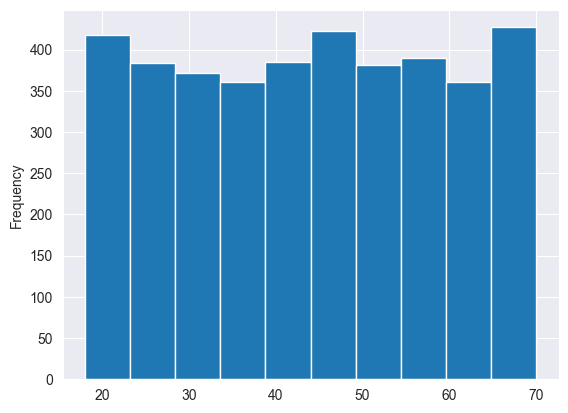

In [15]:
df['Age'].plot(kind='hist')

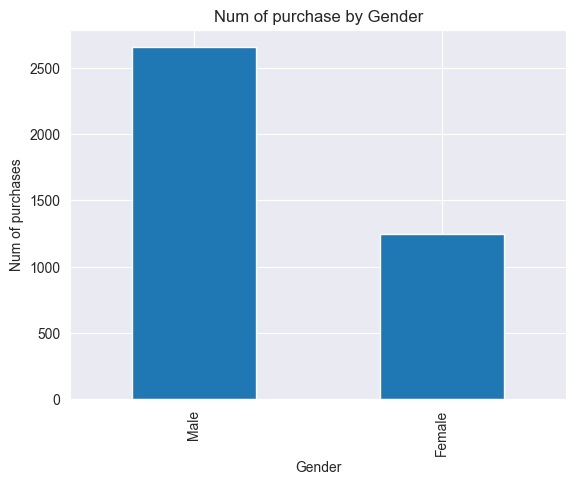

In [19]:
df['Gender'].value_counts().plot(kind='bar')
plt.title("Num of purchase by Gender")
plt.xlabel("Gender")
plt.ylabel("Num of purchases")
plt.show()

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

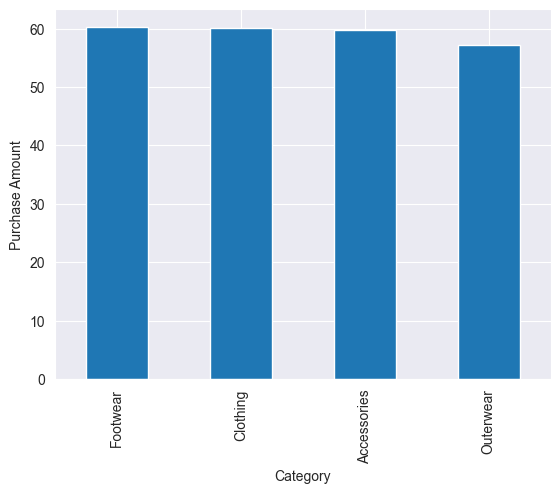

In [24]:
df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Purchase Amount')
plt.show()

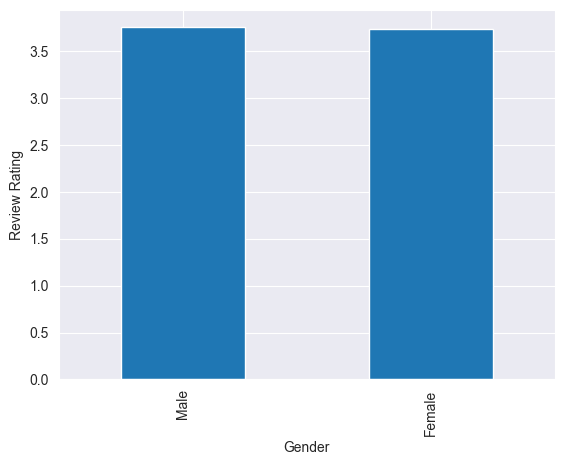

In [25]:
df.groupby('Gender')['Review Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.show()

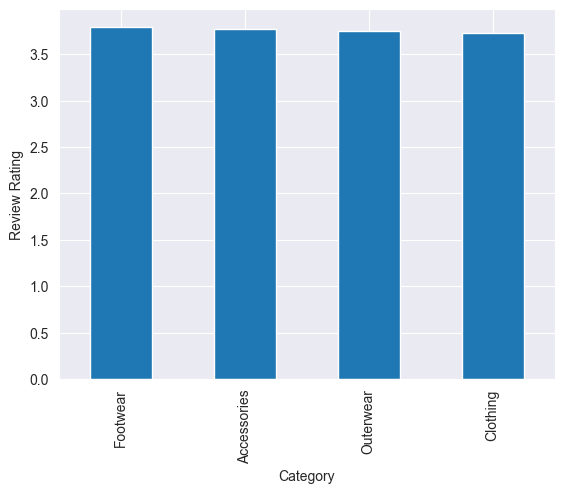

In [52]:
df.groupby('Category')['Review Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

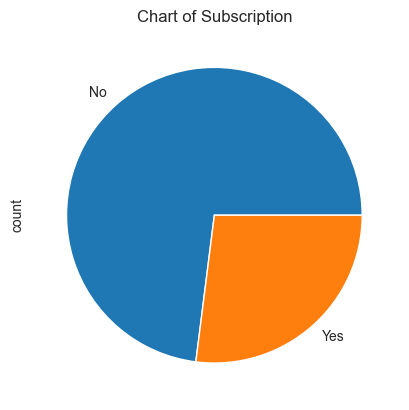

In [27]:
df['Subscription Status'].value_counts().plot(kind='pie')
plt.title("Chart of Subscription")
plt.show()

<Axes: xlabel='Color'>

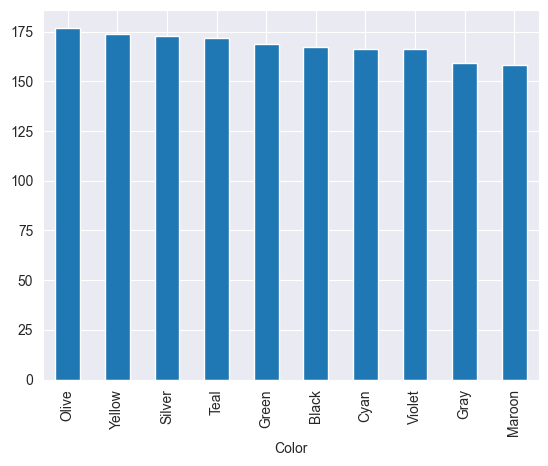

In [30]:
df['Color'].value_counts().head(10).plot(kind='bar')

In [53]:
df['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [54]:
def get_age(age):
    if age <= 35 and age >= 18:
        return 'Young Adult'
    elif age <= 55 and age >= 36:
        return 'Middle-Aged Adult'
    elif age >= 56:
        return 'Senior'

# Apply the function to create the 'race_season' column
df['Age_Categories'] = df['Age'].apply(get_age)

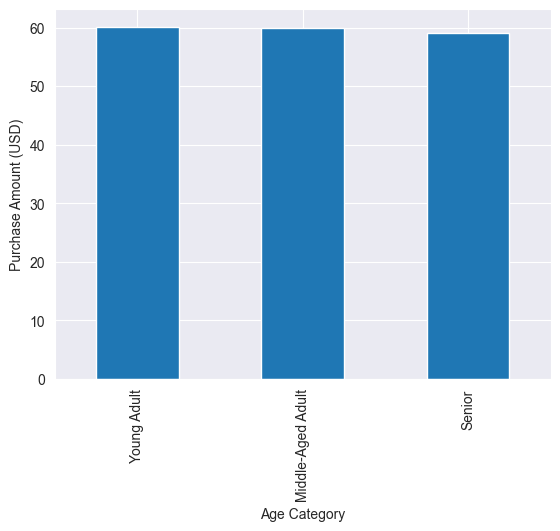

In [55]:
df.groupby('Age_Categories')['Purchase Amount (USD)'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<Axes: xlabel='Age_Categories', ylabel='Purchase Amount (USD)'>

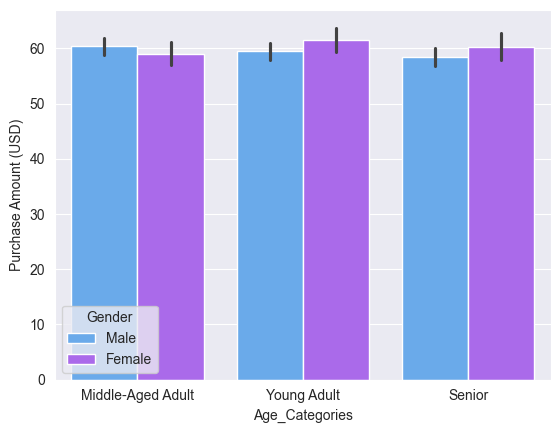

In [58]:
sns.barplot(x='Age_Categories', y='Purchase Amount (USD)', data=df, hue='Gender', palette='cool')

<Axes: xlabel='Season'>

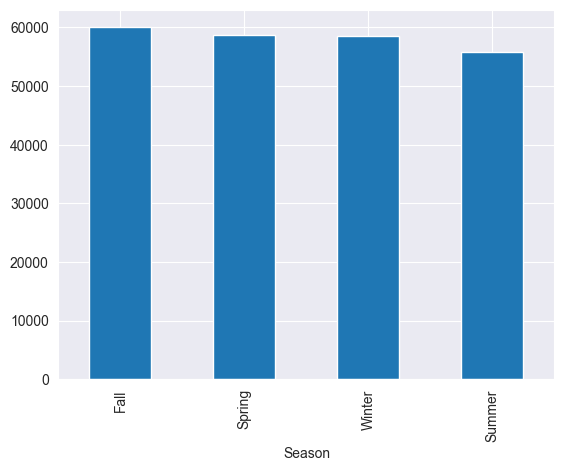

In [49]:
df.groupby(['Season'])['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Category'>

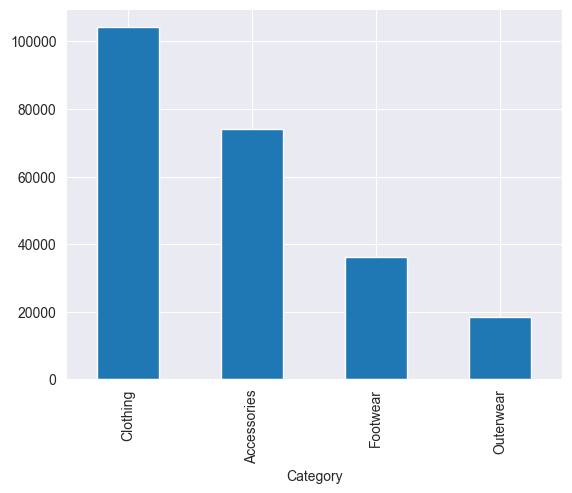

In [62]:
df.groupby(['Category'])['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Preferred Payment Method'>

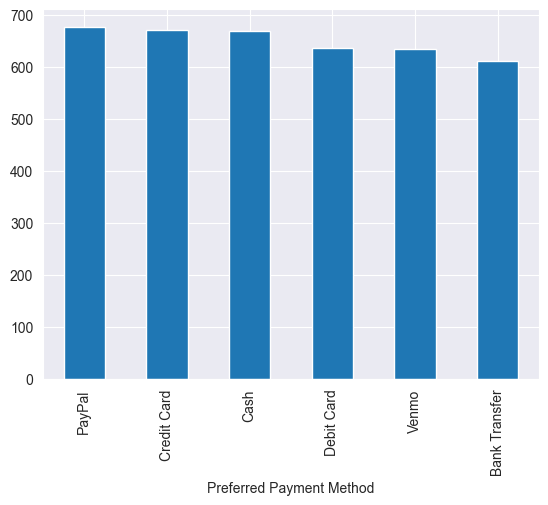

In [68]:
df['Preferred Payment Method'].value_counts().plot(kind='bar')

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.000000,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
Alaska,74.600000,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
Arizona,48.600000,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
Arkansas,90.000000,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
California,57.400000,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
Colorado,57.000000,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,50.500000,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
Connecticut,60.000000,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,63.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
Delaware,33.000000,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,79.333333,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
Florida,59.000000,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,64.250000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000


In [72]:
df.groupby('Size')['Purchase Amount (USD)'].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [75]:
df.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Payment Method
Venmo            61.241960
Credit Card      61.159483
Cash             59.927469
Bank Transfer    58.738924
PayPal           58.697492
Debit Card       58.638231
Name: Purchase Amount (USD), dtype: float64

In [76]:
df.groupby('Discount Applied')['Review Rating'].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [78]:
df.groupby('Color')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Color
Green        65.704142
White        62.640845
Gray         62.490566
Cyan         61.891566
Violet       61.716867
Gold         61.007246
Orange       60.889610
Teal         60.808140
Charcoal     60.633987
Pink         60.588235
Beige        60.414966
Purple       60.013245
Maroon       59.525316
Red          59.317568
Yellow       59.241379
Peach        59.187919
Lavender     59.129252
Brown        59.063830
Black        58.401198
Olive        58.146893
Magenta      57.131579
Blue         56.953947
Silver       56.832370
Indigo       56.251701
Turquoise    55.613793
Name: Purchase Amount (USD), dtype: float64

In [79]:
df.groupby('Frequency of Purchases')['Previous Purchases'].mean()

Frequency of Purchases
Annually          24.561189
Bi-Weekly         24.787934
Every 3 Months    24.960616
Fortnightly       25.271218
Monthly           25.278481
Quarterly         26.854352
Weekly            25.771800
Name: Previous Purchases, dtype: float64

In [85]:
df.groupby('Age_Categories')['Previous Purchases'].mean()

Age_Categories
Middle-Aged Adult    25.296896
Senior               26.192760
Young Adult          24.705255
Name: Previous Purchases, dtype: float64

<Axes: xlabel='Age_Categories', ylabel='Size'>

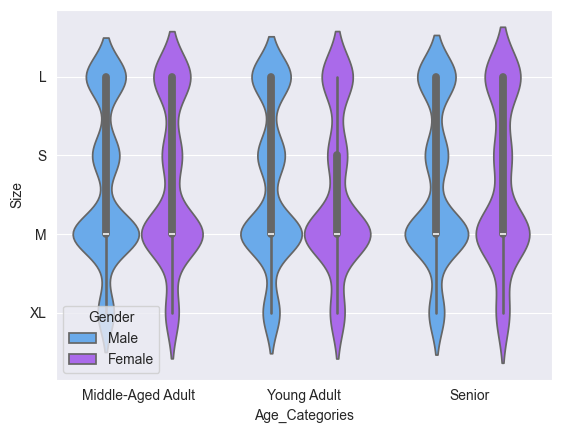

In [92]:
sns.violinplot(x='Age_Categories', y='Size', data=df, hue='Gender', palette='cool')

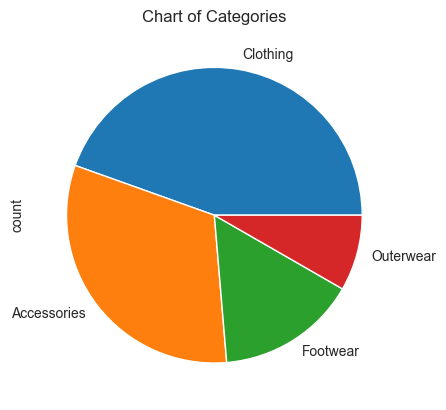

In [93]:
df['Category'].value_counts().plot(kind='pie')
plt.title("Chart of Categories")
plt.show()

In [143]:
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [144]:
df.groupby('Color')['Review Rating'].mean().sort_values(ascending=False)

Color
Gray         3.880503
Yellow       3.864368
Magenta      3.840789
Black        3.840120
Orange       3.828571
Purple       3.821854
Pink         3.802614
Maroon       3.800633
Turquoise    3.798621
White        3.786620
Charcoal     3.783007
Brown        3.748936
Teal         3.737791
Peach        3.734899
Olive        3.724859
Silver       3.724855
Lavender     3.710884
Red          3.704730
Indigo       3.692517
Green        3.684615
Gold         3.670290
Blue         3.667763
Violet       3.653012
Cyan         3.626506
Beige        3.609524
Name: Review Rating, dtype: float64

In [149]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_Categories
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Middle-Aged Adult
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-Aged Adult
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-Aged Adult


In [156]:
df_corr = df[['Purchase Amount (USD)','Age','Review Rating','Previous Purchases']]

In [157]:
df_corr.corr()

,Purchase Amount (USD),Age,Review Rating,Previous Purchases
Purchase Amount (USD),1.000000,-0.010424,0.030776,0.008063
Age,-0.010424,1.000000,-0.021949,0.040445
Review Rating,0.030776,-0.021949,1.000000,0.004229
Previous Purchases,0.008063,0.040445,0.004229,1.000000


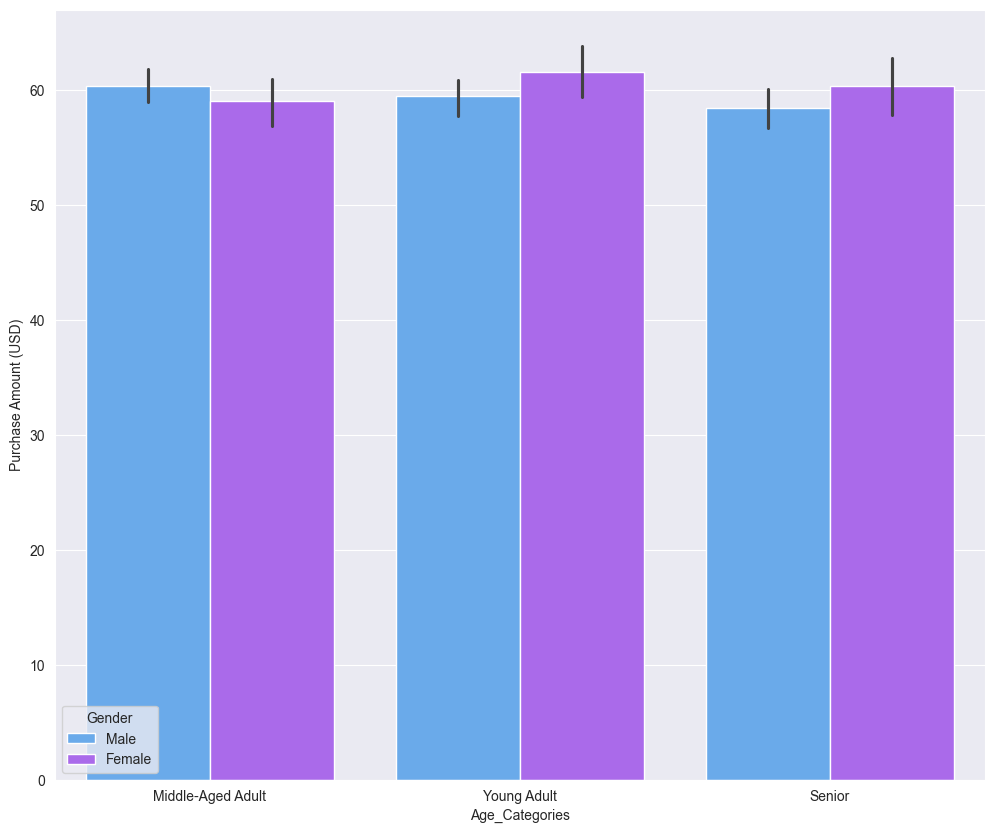

In [166]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, y='Purchase Amount (USD)', x='Age_Categories', hue='Gender', palette='cool')
plt.show()

In [123]:
df_location = pd.pivot_table(df, values='Purchase Amount (USD)', index='Location', columns='Item Purchased', aggfunc='mean')
# Add the index as a column and rename it to 'IndexColumn'
df_location = df_location.reset_index().rename(columns={'index': 'Location'})


In [124]:
df_location

Item Purchased,Location,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,Alabama,74.000000,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
1,Alaska,74.600000,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
2,Arizona,48.600000,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
3,Arkansas,90.000000,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
4,California,57.400000,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
5,Colorado,57.000000,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
6,Connecticut,60.000000,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
7,Delaware,33.000000,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
8,Florida,59.000000,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000
9,Georgia,44.750000,62.000000,64.857143,85.000000,93.000000,69.750000,62.000000,92.000000,70.500000,...,60.200000,45.333333,60.000000,29.500000,49.500000,60.400000,59.428571,69.666667,47.000000,50.000000


<Axes: ylabel='Location'>

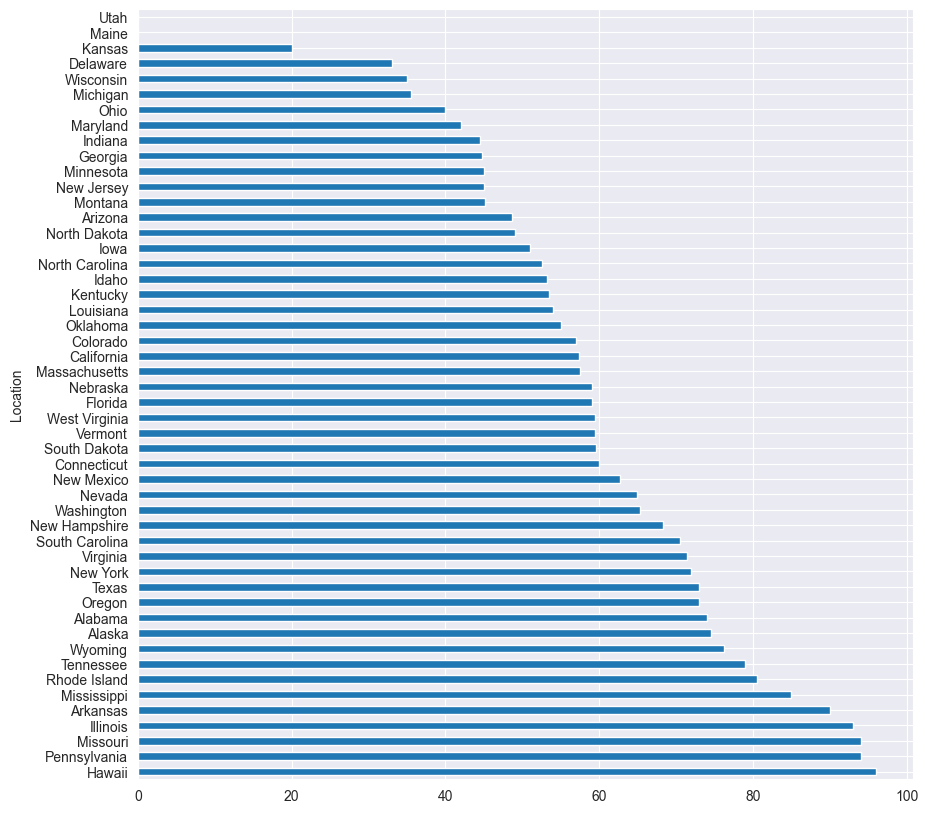

In [125]:
df_location.groupby('Location')['Backpack'].mean().sort_values(ascending=False).plot(kind='barh', stacked=True, figsize=(10, 10))

In [133]:
# Check and strip column names to avoid any space-related issues
df_location.columns = df_location.columns.str.strip()

# Display the column names for verification
print("Columns in the DataFrame:", df_location.columns)

# Melt the DataFrame to have one column for items and another for sales values
melted_df = df_location.melt(id_vars=['Location'], var_name='Item', value_name='Sales')


# Get the most sold item by each state
most_sold = melted_df.loc[melted_df.groupby('Location')['Sales'].idxmax()]
most_sold

Columns in the DataFrame: Index(['Location', 'Backpack', 'Belt', 'Blouse', 'Boots', 'Coat', 'Dress',
       'Gloves', 'Handbag', 'Hat', 'Hoodie', 'Jacket', 'Jeans', 'Jewelry',
       'Pants', 'Sandals', 'Scarf', 'Shirt', 'Shoes', 'Shorts', 'Skirt',
       'Sneakers', 'Socks', 'Sunglasses', 'Sweater', 'T-shirt'],
      dtype='object', name='Item Purchased')


,Location,Item,Sales
1050,Alabama,Socks,93.500000
951,Alaska,Skirt,87.333333
302,Arizona,Gloves,87.000000
903,Arkansas,Shorts,95.000000
1054,California,Socks,83.000000
905,Colorado,Shorts,95.000000
756,Connecticut,Scarf,68.250000
1057,Delaware,Socks,80.000000
58,Florida,Belt,94.000000
209,Georgia,Coat,93.000000


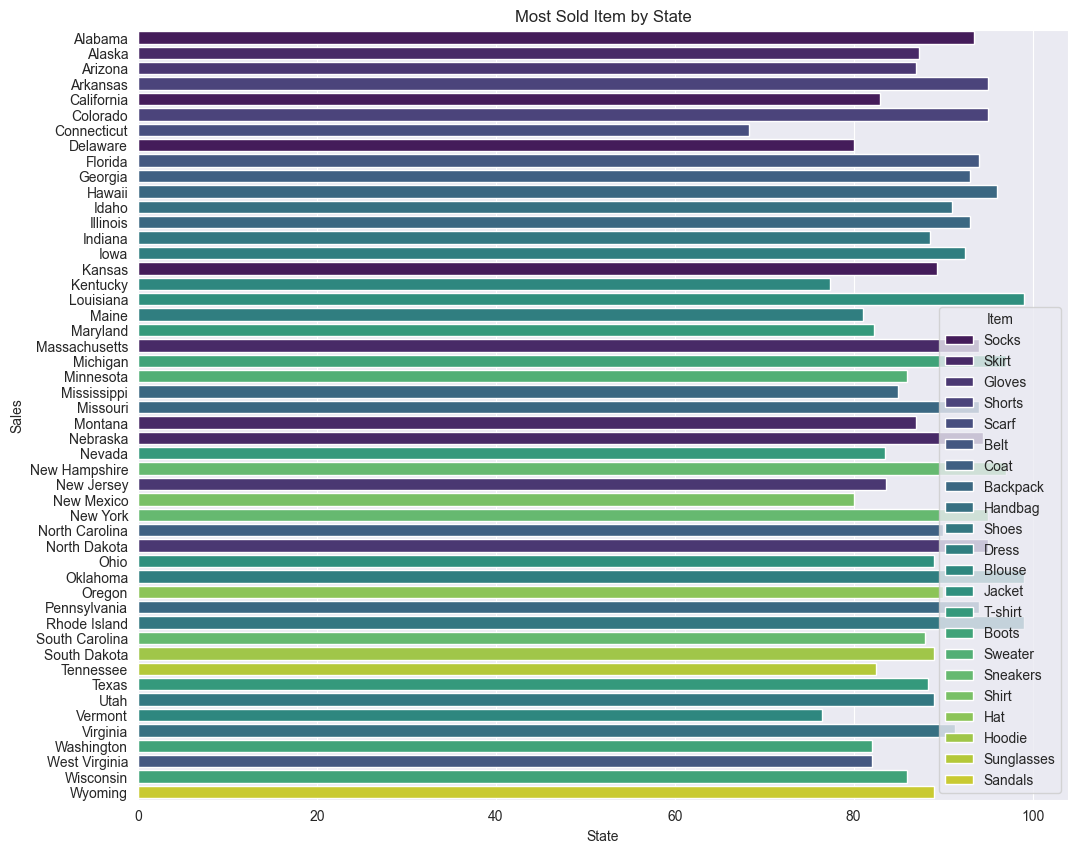

In [132]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a bar plot using Seaborn
sns.barplot(y='Location', x='Sales', hue='Item', data=most_sold, palette='viridis')

# Add title and labels
plt.title('Most Sold Item by State')
plt.xlabel('State')
plt.ylabel('Sales')

# Show the plot
plt.show()